<a href="https://colab.research.google.com/github/rhiats/titanicPrediction/blob/main/titanicPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic - Machine Learning from Disaster**

References:

https://www.kaggle.com/competitions/titanic/data

https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

https://anelmusic13.medium.com/how-to-score-top-3-in-kaggles-titanic-machine-learning-from-disaster-competition-13d056e262b1


In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Exploring the Training Set**

The are 891 passengers in the dataset. It is relatively balanced with 40% of the passengers surviving the catastrophe. The dataset is skewed towards males, with 80% of the data composed of male passengers. There were more males included in this Titanic dataset than females.

Only three of the columns are missing values. The three columns are Ages, Cabin, and Embarked. There are 177 passengers missing Ages, 687 missing Cabin numbers, and 2 missing from Embarked.

It is more likely that a female survives the crash than a male.

In [37]:
def duplicates(df,cols_lst):
  """
    Return df of duplicate rows across specified across columns
    https://www.statology.org/pandas-find-duplicates/

    @p:
    df (df): dataframe containing rows and columns (not empty)
    cols (list): list of columns to ck for duplicates

    @r:
    dups_df (df): Dataframe containing the duplicate rows
  """

  return df[df.duplicated(cols_lst)]

In [38]:
X=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/input/train.csv")
y=X.Survived
X.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis=1,inplace=True)
dupPassengers_df=duplicates(X,['PassengerId'])

In [39]:
print(X.head())
print("The are {} duplicated passengers in the dataset".format(int(dupPassengers_df.shape[0])))
print("The are {} passengers in the dataset".format(int(X.shape[0])))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500
The are 0 duplicated passengers in the dataset
The are 891 passengers in the dataset


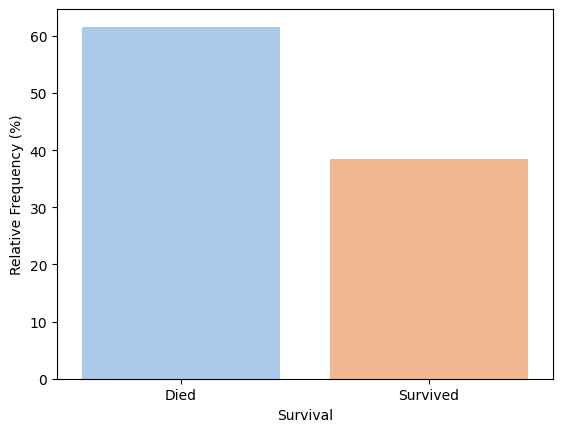

In [56]:
def balanced(df):
  """
    Percentage of passengers who survive v. not survive in the dataset
    Balanced or Imbalanced Data

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  survival_ratio_df=(df[['Survival', 'PassengerId']].groupby('Survival').count()/int(df.shape[0]))*100

  survival_ratio_df.reset_index(inplace=True)

  survival_ratio_df.rename(columns={"PassengerId": "Relative Frequency (%)"}, inplace=True)

  sns.barplot(data=survival_ratio_df, x='Survival', y="Relative Frequency (%)", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/balanced.png")

balanced(X)

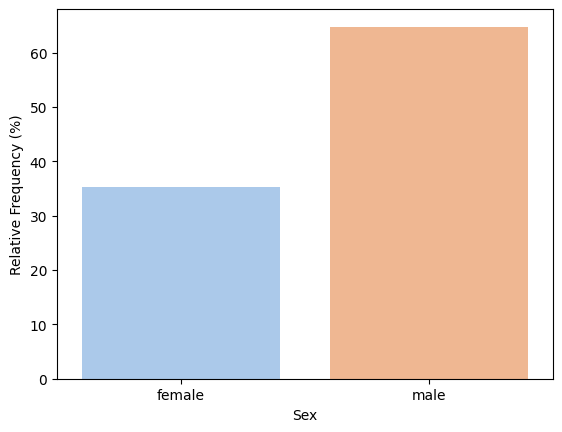

In [55]:
def balanced_sex(df):
  """
    Percentage of passengers by sex
    Balanced or Imbalanced Data

    @p:
      df (dataframe): Input dataframe
  """

  sex_ratio_df=(df[['Sex', 'PassengerId']].groupby('Sex').count()/int(df.shape[0]))*100

  sex_ratio_df.reset_index(inplace=True)

  sex_ratio_df.rename(columns={"PassengerId": "Relative Frequency (%)"}, inplace=True)

  sns.barplot(data=sex_ratio_df, x='Sex', y="Relative Frequency (%)", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/balanced_sex.png")

balanced_sex(X)

In [57]:
def nan_num(df):
  """
    Return the number of nans per column in the data set.

  """
  nan_count=df.isna().sum()
  return nan_count
nan_num(X)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Survival         0
dtype: int64

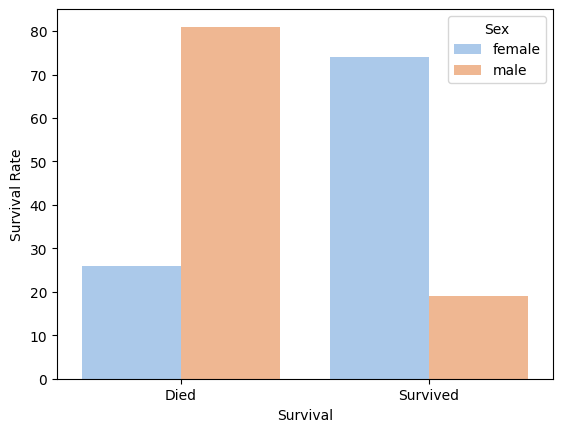

In [54]:
def sex_survival(df):
  """
    Probability Females Survived v. Males survive (Conditional Probability)

    @p:
      df (dataframe): Input dataframe
  """
  df['Survival'] = np.where(df['Survived']==0, 'Died', 'Survived')

  survival_sx_df=df[['Survival', 'Sex', 'PassengerId']].groupby(['Sex','Survival']).count()

  survival_sx_df.reset_index(inplace=True)

  survival_sx_df.rename(columns={"PassengerId": "Count Survived"}, inplace=True)

  sx_df=df[['Sex', 'PassengerId']].groupby(['Sex']).count()

  sx_df.reset_index(inplace=True)

  sx_df.rename(columns={"PassengerId": "Count"}, inplace=True)

  sx_survival_df=pd.merge(survival_sx_df,sx_df,on="Sex")

  sx_survival_df["Survival Rate"]=round((sx_survival_df["Count Survived"]/sx_survival_df["Count"])*100,0)

  sns.barplot(data=sx_survival_df, x="Survival", y="Survival Rate", hue="Sex", palette="pastel")

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/titanicPrediction/output/sex_survival_rate.png")

sex_survival(X)


In [ ]:
#Number of Adults (Age 16) who Survived the titanic crash



In [58]:
#Distribution of fares

**Feature Engineering**


In [ ]:
def adult_flag(df):
  """
    Children and adults may have different survival rates.
    Remove Age column
    @p:
    df (df): dataframe of input data

    @r: dataframe with adult flag
  """
  df['adult_flag']=np.where((df['Age']>16), 1, 0)
  X.drop(['Age'], axis=1,inplace=True)
  return df

def family_sz(df):
  """
    Family size (parents and children)
    @p:
    df (df): input dataframe

    @r: dataframe with family size column. Parents and children columns removed
  """
  df['adult_flag']=np.where((df['Age']>16), 1, 0)
  X.drop(['Age'], axis=1,inplace=True)
  return df

In [ ]:
X=adult_flag(X)
X.head()